# <span style="font-family:Georgia; text-align:center;">Doble péndulo</span> 
<span style="font-family:Georgia;">

<img src="imgs/PenduloDoble.png" width=200>

### Variables y parámetros
- Ángulos $\theta_1(t), \theta_2(t)$ medidos desde la vertical.
- Longitudes $l_1, l_2 > 0$, masas $m_1, m_2 > 0$, gravedad $g>0$.
- Velocidades angulares $\omega_1(t)=\dot\theta_1(t)$, $\omega_2(t)=\dot\theta_2(t)$.

### Ecuaciones de movimiento
Definimos
$$
\Delta = 2m_1 + m_2 - m_2\cos\!\bigl(2\theta_1 - 2\theta_2\bigr).
$$
El sistema de primer orden es
$$
\begin{aligned}
\dot\theta_1 &= \omega_1,\\
\dot\theta_2 &= \omega_2,\\[2pt]
\dot\omega_1 &= \frac{-g(2m_1+m_2)\sin\theta_1 - m_2 g \sin(\theta_1-2\theta_2) - 2\sin(\theta_1-\theta_2)\,m_2\left(\omega_2^2 l_2 + \omega_1^2 l_1 \cos(\theta_1-\theta_2)\right)}{l_1\,\Delta},\\[6pt]
\dot\omega_2 &= \frac{2\sin(\theta_1-\theta_2)\left(\omega_1^2 l_1 (m_1+m_2) + g (m_1+m_2)\cos\theta_1 + \omega_2^2 l_2 m_2 \cos(\theta_1-\theta_2)\right)}{l_2\,\Delta}.
\end{aligned}
$$


<span style="font-family:Georgia;">

## Recordatorio del esquema RK4

Sea $y' = f(t,y)$ en $\mathbb{R}^d$ y paso $h>0$.
$$
\begin{aligned}
k_1 &= f(t_n,\; y_n),\\
k_2 &= f\!\bigl(t_n+\tfrac{h}{2},\; y_n+\tfrac{h}{2}k_1\bigr),\\
k_3 &= f\!\bigl(t_n+\tfrac{h}{2},\; y_n+\tfrac{h}{2}k_2\bigr),\\
k_4 &= f\!\bigl(t_n+h,\; y_n+h\,k_3\bigr),\\[4pt]
y_{n+1} &= y_n + \tfrac{h}{6}\,\bigl(k_1 + 2k_2 + 2k_3 + k_4\bigr).
\end{aligned}
$$

In [1]:
%matplotlib widget
from src.pendulo_doble import *

# Ejecuta el widget
dobles_pendulos_interactivo(
)

<span style="font-family:Georgia;">

## Ejercicios


1. **Exploración básica:** Con los parámetros por defecto, grafica $ \theta_1(t), \theta_2(t) $ y observa el tipo de movimiento. ¿Cambia algo si duplicas $L_1, L_2$ manteniendo $g$?


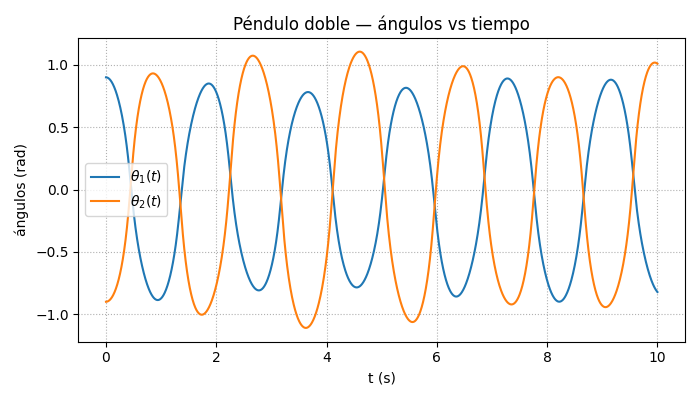

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- util: asegura tiempos y llamadas limpias
def integra(dt, T, th1_0, th2_0, w1_0, w2_0, L1, L2, m1, m2, g):
    n = int(round(T/dt))
    th1, th2, w1, w2 = integrar_doble_pendulo_rk4(th1_0, th2_0, w1_0, w2_0,
                                                   L1, L2, m1, m2, g, dt, n)
    t = np.arange(n+1)*dt
    return t, th1, th2, w1, w2

# Caso 1 
t, th1, th2, w1, w2 = integra(
    dt=0.005, T=10.0,
    th1_0=0.9, th2_0=-0.9, w1_0=0.0, w2_0=0.0,
    L1=1.0, L2=1.0, m1=1.0, m2=1.0, g=9.81
)

plt.figure(figsize=(7,4))
plt.plot(t, th1, label=r'$\theta_1(t)$')
plt.plot(t, th2, label=r'$\theta_2(t)$')
plt.xlabel('t (s)'); plt.ylabel('ángulos (rad)')
plt.title('Péndulo doble — ángulos vs tiempo')
plt.grid(True, ls=':')
plt.legend(); plt.tight_layout(); plt.show()


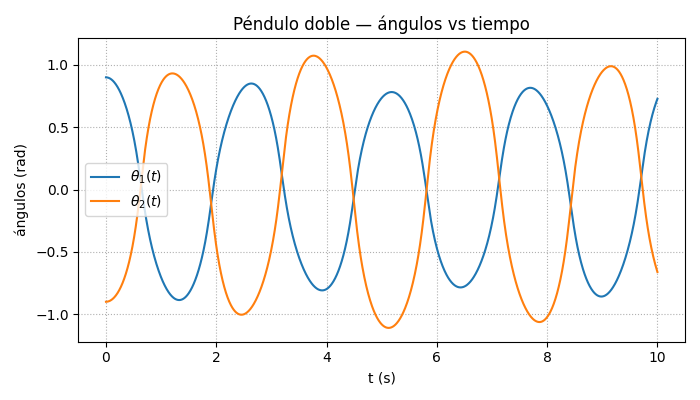

In [3]:
# Caso 2: longitudes duplicadas
t, th1, th2, w1, w2 = integra(
    dt=0.005, T=10.0,
    th1_0=0.9, th2_0=-0.9, w1_0=0.0, w2_0=0.0,
    L1=2.0, L2=2.0, m1=1.0, m2=1.0, g=9.81
)

plt.figure(figsize=(7,4))
plt.plot(t, th1, label=r'$\theta_1(t)$')
plt.plot(t, th2, label=r'$\theta_2(t)$')
plt.xlabel('t (s)'); plt.ylabel('ángulos (rad)')
plt.title('Péndulo doble — ángulos vs tiempo')
plt.grid(True, ls=':')
plt.legend(); plt.tight_layout(); plt.show()

<span style="font-family:Georgia;">

2. **Energía mecánica:** Grafica la energía total del sistema $E(t)=T(t)+V(t)$ donde:

La energía cinética $T$ esta compuesta por la rapidez del primer péndulo:  $$v_1 = L_1 |\omega_1|,$$  y la del segundo:
$$
v_2^2 \;=\; L_1^2 \omega_1^2 \;+\; L_2^2 \omega_2^2 \;+\; 2 L_1 L_2 \omega_1 \omega_2 \cos(\theta_1-\theta_2).
$$

Por tanto,
$$
\boxed{
T \;=\; \frac{1}{2} m_1\,L_1^2\,\omega_1^2
\;+\; \frac{1}{2} m_2\!\left(
L_1^2 \omega_1^2 + L_2^2 \omega_2^2 + 2 L_1 L_2 \omega_1 \omega_2 \cos(\theta_1-\theta_2)
\right).
}
$$

La energía potencial $V$ esta compuesta por las alturas (respecto a la vertical hacia abajo) dando lugar a
$$
V \;=\; (m_1+m_2)\,g\,L_1\,(1-\cos\theta_1) \;+\; m_2\,g\,L_2\,(1-\cos\theta_2).
$$
Reporta el **error relativo máximo**: $$\max_t \tfrac {|E(t)-E(0)|}{ E(0)}$$ para tamaños de paso $dt=\{10^{-2}, 5{\times}10^{-3}, 10^{-3}\}$.


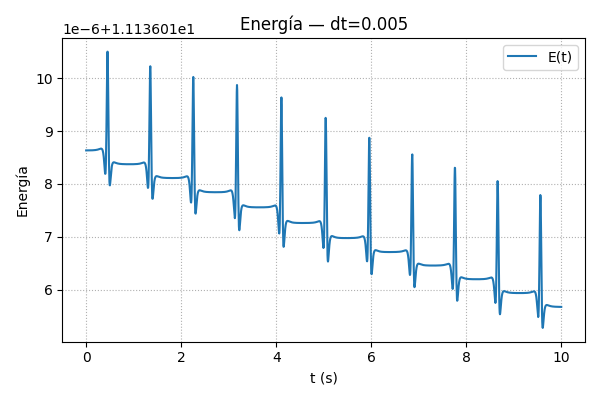

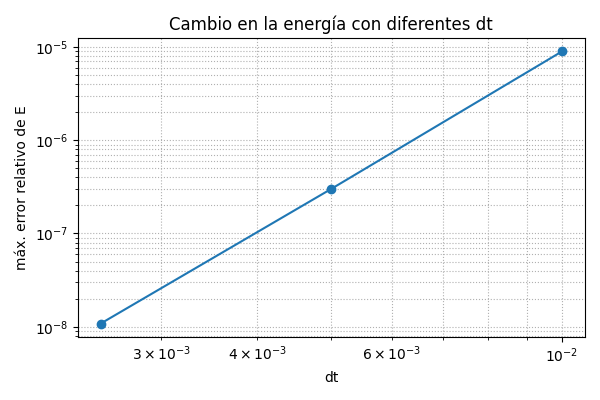

In [4]:
def energia_pendulo_doble(th1, th2, w1, w2, L1, L2, m1, m2, g):
    T = 0.5*m1*(L1**2)*(w1**2) + 0.5*m2*(L1**2*w1**2 + L2**2*w2**2 + 2*L1*L2*w1*w2*np.cos(th1-th2))
    V = (m1+m2)*g*L1*(1-np.cos(th1)) + m2*g*L2*(1-np.cos(th2))
    return T, V, T+V

def energia_vs_dt(dt_list, Tfin=10.0):
    errs = []
    for dt in dt_list:
        t, th1, th2, w1, w2 = integra(dt, Tfin, 0.9, -0.9, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 9.81)
        T_, V_, E = energia_pendulo_doble(th1, th2, w1, w2, 1.0, 1.0, 1.0, 1.0, 9.81)
        err_rel = np.max(np.abs(E - E[0]))/abs(E[0])
        errs.append(err_rel)
        # Traza ejemplo (opcional)
        if dt == min(dt_list, key=lambda x: abs(x-0.005)):  # muestra uno representativo
            import matplotlib.pyplot as plt
            plt.figure(figsize=(6,4))
            plt.plot(t, E, label='E(t)')
            plt.xlabel('t (s)'); plt.ylabel('Energía')
            plt.title(f'Energía — dt={dt}')
            plt.grid(True, ls=':'); plt.legend(); plt.tight_layout(); plt.show()
    return np.array(dt_list), np.array(errs)

dts, errs = energia_vs_dt([0.01, 0.005, 0.0025])
plt.figure(figsize=(6,4))
plt.loglog(dts, errs, 'o-')
plt.xlabel('dt'); plt.ylabel('máx. error relativo de E')
plt.title('Cambio en la energía con diferentes dt')
plt.grid(True, which='both', ls=':')
plt.tight_layout(); plt.show()


<span style="font-family:Georgia;">

3. **Sensibilidad a condiciones iniciales (caos):** Corre dos simulaciones con conidiciones inciales idénticas salvo $\Delta \theta_1(0)=10^{-2}$. ¿Qué observas cuando $t$ es muy grande?


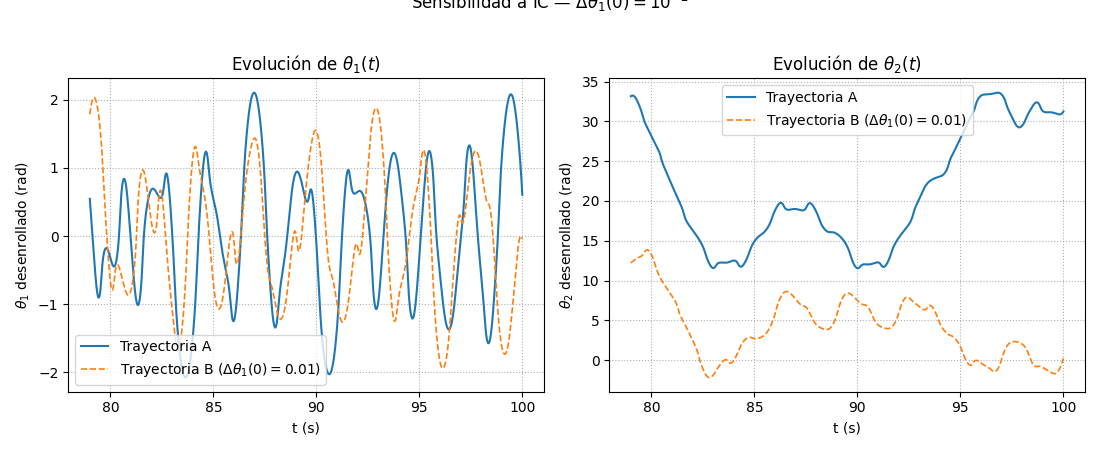

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# --- utilidades ---
def integra(dt, T, th1_0, th2_0, w1_0, w2_0, L1, L2, m1, m2, g):
    n = int(round(T/dt))
    th1, th2, w1, w2 = integrar_doble_pendulo_rk4(
        th1_0, th2_0, w1_0, w2_0,
        L1, L2, m1, m2, g, dt, n
    )
    t = np.arange(n+1)*dt
    return t, th1, th2, w1, w2

# --- parámetros e IC (puedes ajustarlos) ---
L1=L2=1.0; m1=m2=1.0; g=9.81
theta1_0 = 1.9
theta2_0 = 0.9
w1_0 = 0.0
w2_0 = 0.0
delta = 1e-2          # Δθ1(0) = 10^{-2}
dt = 0.003
T  = 100.0             # “t grande” 

# --- integra dos trayectorias: base y perturbada ---
t, th1_A, th2_A, w1_A, w2_A = integra(dt, T, theta1_0,          theta2_0, w1_0, w2_0, L1, L2, m1, m2, g)
_, th1_B, th2_B, w1_B, w2_B = integra(dt, T, theta1_0+delta,     theta2_0, w1_0, w2_0, L1, L2, m1, m2, g)

# --- desenrolla para evitar saltos en ±π ---
u_th1_A = np.unwrap(th1_A)
u_th1_B = np.unwrap(th1_B)
u_th2_A = np.unwrap(th2_A)
u_th2_B = np.unwrap(th2_B)

# --- gráfica: evolución de los ángulos ---
fig, ax = plt.subplots(1, 2, figsize=(11, 4.5), sharex=True)
# graficamos solo la parte final para ver la divergencia
ax[0].plot(t[-7000:], u_th1_A[-7000:], lw=1.5, label=r'Trayectoria A')
ax[0].plot(t[-7000:], u_th1_B[-7000:], lw=1.2, ls='--', label=rf'Trayectoria B ($\Delta\theta_1(0)={delta}$)')
ax[0].set_xlabel('t (s)')
ax[0].set_ylabel(r'$\theta_1$ desenrollado (rad)')
ax[0].set_title(r'Evolución de $\theta_1(t)$')
ax[0].grid(True, ls=':')
ax[0].legend()

# graficamos solo la parte final para ver la divergencia
ax[1].plot(t[-7000:], u_th2_A[-7000:], lw=1.5, label=r'Trayectoria A')
ax[1].plot(t[-7000:], u_th2_B[-7000:], lw=1.2, ls='--', label=rf'Trayectoria B ($\Delta\theta_1(0)={delta}$)')
ax[1].set_xlabel('t (s)')
ax[1].set_ylabel(r'$\theta_2$ desenrollado (rad)')
ax[1].set_title(r'Evolución de $\theta_2(t)$')
ax[1].grid(True, ls=':')
ax[1].legend()

fig.suptitle(r'Sensibilidad a IC — $\Delta\theta_1(0)=10^{-2}$', y=1.02, fontsize=12)
plt.tight_layout()
plt.show()


<span style="font-family:Georgia;">

4. **Retratos de fase.** Grafica $(\theta_1 \bmod 2\pi,\ \omega_1)$ y $(\theta_2 \bmod 2\pi,\ \omega_2)$.


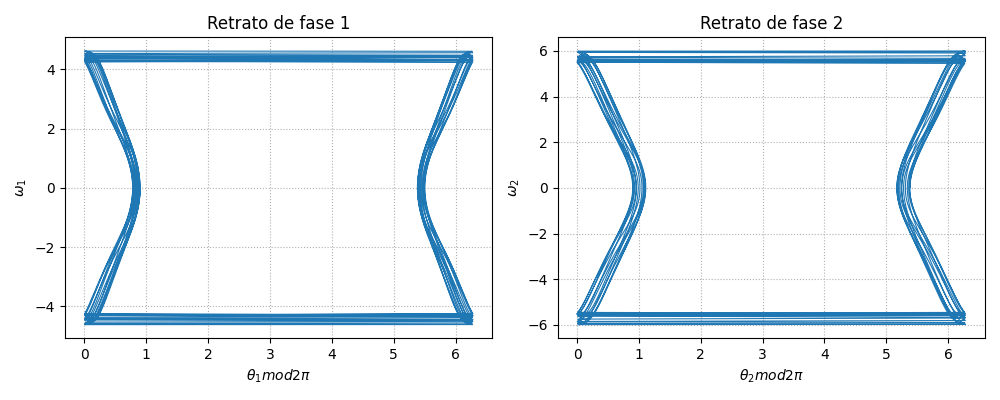

In [6]:
def mod_2pi(a):  # (0, 2π]
    return (a + 2*np.pi) % (2*np.pi)

t, th1, th2, w1, w2 = integra(0.003, 25.0, 0.9, -0.9, 0.0, 0.0, 1,1,1,1,9.81)

fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].plot(mod_2pi(th1), w1, lw=0.8)
ax[0].set_xlabel(r'$\theta_1 mod 2\pi$'); ax[0].set_ylabel(r'$\omega_1$')
ax[0].set_title('Retrato de fase 1'); ax[0].grid(True, ls=':')

ax[1].plot(mod_2pi(th2), w2, lw=0.8)
ax[1].set_xlabel(r'$\theta_2 mod 2\pi$'); ax[1].set_ylabel(r'$\omega_2$')
ax[1].set_title('Retrato de fase 2'); ax[1].grid(True, ls=':')

plt.tight_layout(); plt.show()


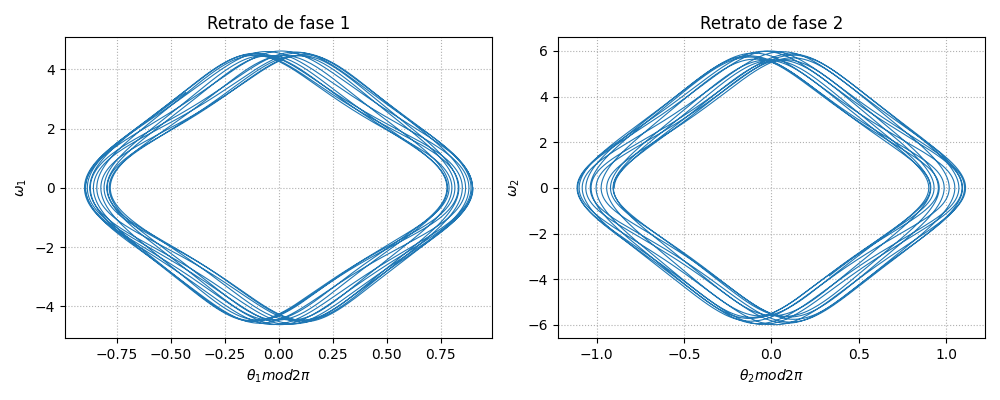

In [7]:

t, th1, th2, w1, w2 = integra(0.003, 25.0, 0.9, -0.9, 0.0, 0.0, 1,1,1,1,9.81)

fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].plot(th1, w1, lw=0.8)
ax[0].set_xlabel(r'$\theta_1 mod 2\pi$'); ax[0].set_ylabel(r'$\omega_1$')
ax[0].set_title('Retrato de fase 1'); ax[0].grid(True, ls=':')

ax[1].plot(th2, w2, lw=0.8)
ax[1].set_xlabel(r'$\theta_2 mod 2\pi$'); ax[1].set_ylabel(r'$\omega_2$')
ax[1].set_title('Retrato de fase 2'); ax[1].grid(True, ls=':')

plt.tight_layout(); plt.show()

<span style="font-family:Georgia;">

5. **Orden de Convergencia:** Con las condiciones iniciales A) del ejercicio 7, calcula una “solución de referencia” con tamaño de paso $dt_\text{ref}$ muy pequeño, por ejemplo $10^{-3}$. Para varios tamaños de paso mas grandes $2dt_\text{ref}, 4dt_\text{ref}$ y $8dt_\text{ref}$ en $[0,30]$. Toma esta aproximación como una solución $y(t)$. Recuerda que el error se define como $e_n=|y(t_n)-\hat{y}(t_n)|$. ¿Qué observas? ¿Tiene sentido? ¿Porqué?

**Caso 1 — Gráfica $\log e$ vs $\log dt$ (pendiente esperada = orden = 4).**  
1. Integra con un **paso de referencia** muy fino $dt_\text{ref}=10^{-3}$ y toma esa solución como $\hat y(t)$ (referencia “casi exacta”).  
2. Integra con pasos más grandes $dt \in \{2,4,8\}\,dt_\text{ref}$.  
3. Para cada $dt$, calcula el **error global**  
   $$
   e(dt)=\max_{t\in[0,30]}\big|\,y(t)-\hat y(t)\,\big|.
   $$
   (Aquí usamos $y(t)\equiv \theta_1(t)$; puedes repetir con $\theta_2$.)  
4. Grafica $\log e(dt)$ vs $\log dt$ y ajusta una recta. La **pendiente** debe ser ≈ **4** (orden de RK4).

**Caso 2 — Gráfica $\log e_{n+1}$ vs $\log e_n$ (factor esperado $2^4=16$).**  
Define $e_n=e(2^n dt_\text{ref})$. Para un método de orden $p$:  
$$
e_{n+1}\approx 2^{p}\,e_n.
$$
Para RK4 ($p=4$), $e_{n+1}\approx 16\,e_n$. En $\log$-$\log$, eso es una **recta de pendiente 1** con offset $\log 16$. (En escala lineal sería una recta por el origen de **pendiente 16**).  

**Qué observar:**  
- En el **Caso 1** la pendiente del ajuste $\approx 4$ confirma el orden de RK4.  
- En el **Caso 2** los puntos caen cerca de la línea guía $e_{n+1}=16\,e_n$, coherente con doblar el paso en un método de orden 4. 


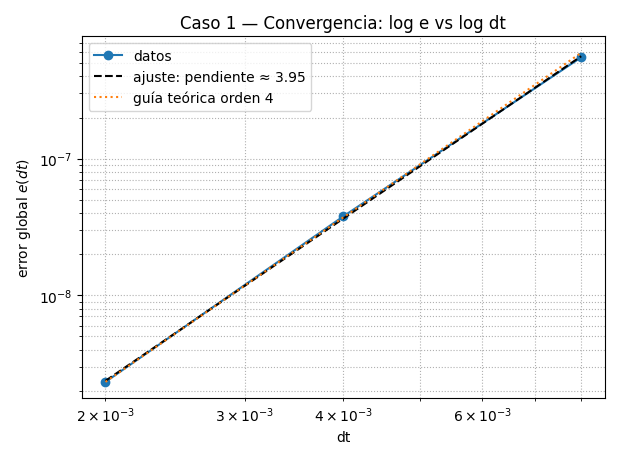

[Caso 1] Pendiente estimada (orden) ≈ 3.945 (RK4 → 4)


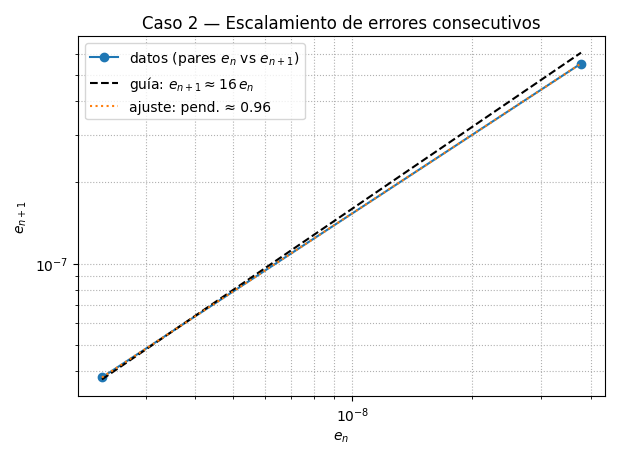

[Caso 2] Ajuste en log–log: pendiente ≈ 0.961 (esperado ≈ 1.00)
[Caso 2] Ratios e(2dt)/e(dt): 16.27, 14.58 (esperado ≈ 16.00)


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- Utilidades ----------
def wrap_pi(a):  # mapear a (-pi, pi]
    return (a + np.pi) % (2*np.pi) - np.pi

def integra_theta1(dt, T, th1_0, th2_0, w1_0, w2_0, L1, L2, m1, m2, g):
    n = int(round(T/dt))
    th1, th2, w1, w2 = integrar_doble_pendulo_rk4(
        th1_0, th2_0, w1_0, w2_0, L1, L2, m1, m2, g, dt, n
    )
    return th1  # usamos θ1 como y(t). Puedes repetir con θ2 si deseas.

# ---------- Parámetros del ejercicio ----------
L1=L2=1.0; m1=m2=1.0; g=9.81
th1_0=0.15; th2_0=-0.12; w1_0=0.0; w2_0=0.0
T = 30.0
dt_ref = 1e-3
dt_list = [2*dt_ref, 4*dt_ref, 8*dt_ref]   # pasos “grandes”

# ---------- Solución de referencia ----------
theta1_ref = integra_theta1(dt_ref, T, th1_0, th2_0, w1_0, w2_0, L1, L2, m1, m2, g)

# ---------- Errores globales vs referencia ----------
errors = []
for dt in dt_list:
    k = int(round(dt/dt_ref))          # razón entera esperada (2,4,8)
    theta1_dt = integra_theta1(dt, T, th1_0, th2_0, w1_0, w2_0, L1, L2, m1, m2, g)
    n = len(theta1_dt) - 1
    # Compara en tiempos coincidentes: toma 1 de cada k muestras de la referencia
    ref_idx = np.arange(n+1)*k
    ref_idx = np.clip(ref_idx, 0, len(theta1_ref)-1)
    err_t = np.abs(wrap_pi(theta1_dt - theta1_ref[ref_idx]))
    e_global = np.max(err_t)
    errors.append(e_global)

errors = np.array(errors)
dts = np.array(dt_list)

# ===================== CASO 1: log e vs log dt (pendiente ~ 4) =====================
slope1, intercept1 = np.polyfit(np.log(dts), np.log(errors), 1)

plt.figure(figsize=(6.2,4.6))
plt.loglog(dts, errors, 'o-', label='datos')
# Recta guía con pendiente = slope1 (del ajuste)
xg = np.array([dts.min(), dts.max()])
yg = np.exp(intercept1) * xg**slope1
plt.loglog(xg, yg, 'k--', label=f'ajuste: pendiente ≈ {slope1:.2f}')
# Recta teórica de orden 4 anclada en el punto de menor dt
x4 = xg
y4 = errors[0] * (x4/dts[0])**4
plt.loglog(x4, y4, ':', label='guía teórica orden 4')
plt.xlabel('dt'); plt.ylabel(r'error global $e(dt)$')
plt.title('Caso 1 — Convergencia: log e vs log dt')
plt.grid(True, which='both', ls=':')
plt.legend()
plt.tight_layout()
plt.show()

print(f"[Caso 1] Pendiente estimada (orden) ≈ {slope1:.3f} (RK4 → 4)")

# ============ CASO 2: log e_{n+1} vs log e_n (e_{n+1} ≈ 16 e_n) ===============
# formamos pares (e_n, e_{n+1}) usando errors = [e(2dt_ref), e(4dt_ref), e(8dt_ref)]
if len(errors) >= 2:
    x_err = errors[:-1]
    y_err = errors[1:]
    # Ajuste en log–log (pendiente esperada ≈ 1, offset ≈ log 16)
    slope2, intercept2 = np.polyfit(np.log(x_err), np.log(y_err), 1)

    plt.figure(figsize=(6.2,4.6))
    plt.loglog(x_err, y_err, 'o-', label='datos (pares $e_n$ vs $e_{n+1}$)')
    # Guía RK4: e_{n+1} = 16 e_n
    xg2 = np.array([x_err.min(), x_err.max()])
    yg2 = 16.0 * xg2
    plt.loglog(xg2, yg2, 'k--', label=r'guía: $e_{n+1}\approx 16\,e_n$')
    # Recta del ajuste obtenido
    yg_fit = np.exp(intercept2) * xg2**slope2
    plt.loglog(xg2, yg_fit, ':', label=f'ajuste: pend. ≈ {slope2:.2f}')
    plt.xlabel(r'$e_n$'); plt.ylabel(r'$e_{n+1}$')
    plt.title('Caso 2 — Escalamiento de errores consecutivos')
    plt.grid(True, which='both', ls=':')
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"[Caso 2] Ajuste en log–log: pendiente ≈ {slope2:.3f} (esperado ≈ 1.00)")
    print(f"[Caso 2] Ratios e(2dt)/e(dt): " +
          ", ".join(f"{r:.2f}" for r in (y_err/x_err)) + " (esperado ≈ 16.00)")



<span style="font-family:Georgia;">

6. **Curva paramétrica de ángulos.** Dibuja $(\theta_1(t),\theta_2(t))$ identificando el tiempo inicial y el tiempo final.  


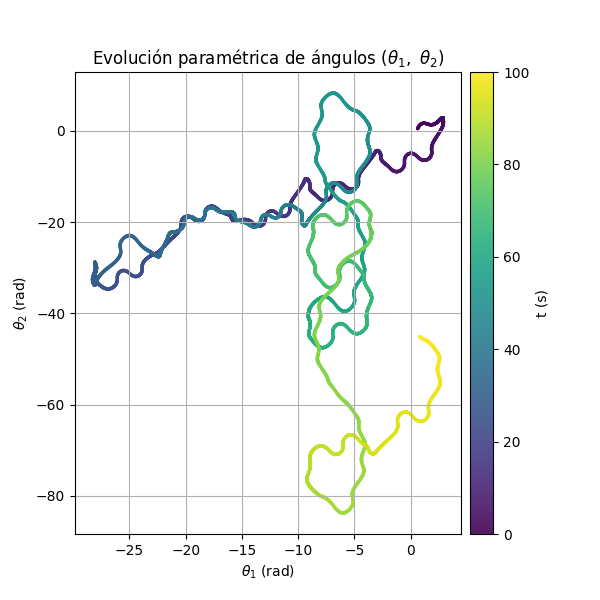

In [9]:
grafica_parametrica_angulos(theta1_0=np.pi/5, theta2_0=np.pi/7,
                            w1_0=1.4, w2_0=5.7,
                            L1=4.0, L2=1.0,
                            m1=4.0, m2=9.0,
                            g=5.81,T=100.0,
                            wrap='unwrap')


<span style="font-family:Georgia;">

7. **Condiciones iniciales:** Para el siguiente grupo de condiciones inciales, explica que sucede en el sistema(usa la animación).

### A) Oscilaciones pequeñas
- $L_1=1.0,\ L_2=1.0,\ m_1=1.0,\ m_2=1.0$  
- $\theta_1(0)=0.15,\ \theta_2(0)=-0.12,\ \omega_1(0)=0,\ \omega_2(0)=0$

### B) Cercano a separatriz 
- $L_1=1.0,\ L_2=1.0,\ m_1=1.0,\ m_2=1.0$  
- $\theta_1(0)=2.6,\ \theta_2(0)=0.0,\ \omega_1(0)=0,\ \omega_2(0)=0$

### C) Régimen caótico “clásico”
- $L_1=1.0,\ L_2=1.0,\ m_1=1.0,\ m_2=1.0$  
- $\theta_1(0)=0.9,\ \theta_2(0)=-0.9,\ \omega_1(0)=0,\ \omega_2(0)=0$

### D) Rotación del brazo 1 
- $L_1=1.0,\ L_2=0.7,\ m_1=1.0,\ m_2=0.5$  
- $\theta_1(0)=0.0,\ \theta_2(0)=0.0,\ \omega_1(0)=6.0,\ \omega_2(0)=0.0$

### E) Transferencia de energía marcada 
- $L_1=1.0,\ L_2=1.2,\ m_1=1.0,\ m_2=0.8$  
- $\theta_1(0)=0.7,\ \theta_2(0)=-0.2,\ \omega_1(0)=0.0,\ \omega_2(0)=2.5$

### F) Asimetría de masas 
- $L_1=1.0,\ L_2=1.0,\ m_1=0.8,\ m_2=2.0$  
- $\theta_1(0)=0.6,\ \theta_2(0)=-0.4,\ \omega_1(0)=0.0,\ \omega_2(0)=0.0$

### G) Palanca fuerte
- $L_1=1.0,\ L_2=1.8,\ m_1=1.0,\ m_2=1.0$  
- $\theta_1(0)=0.5,\ \theta_2(0)=-0.3,\ \omega_1(0)=0.0,\ \omega_2(0)=0.0$

### H) Gravedad baja 
- $L_1=1.0,\ L_2=1.0,\ m_1=1.0,\ m_2=1.0,\ g=1.62$  
- $\theta_1(0)=0.9,\ \theta_2(0)=-0.9,\ \omega_1(0)=0.0,\ \omega_2(0)=0.0$

### I) Caos por IC casi idénticas 
- Caso base: $L_1=L_2=m_1=m_2=1$; $\theta_1(0)=0.9,\ \theta_2(0)=-0.9,\ \omega_1(0)=\omega_2(0)=0$.  
- Caso perturbado: igual pero con $\theta_1(0)\to 0.901$.